In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Import the train datasets

In [2]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

# Setup Pipeline

In [3]:
pca=PCA()
SLR = Ridge()

In [4]:
# Step 1: PCA
# Step 2: Model
pipe = Pipeline(steps=[("pca",pca),("SLR",SLR)])

In [5]:
param_grid = {
    "pca__n_components": [5, 10, 30, 45, 60, 100 ,150 ,170],
    "SLR__alpha":[0.05,0.1,0.2,0.5,1,2,8,10,100,1000,10000]
}

# Setup GridSearch

In [6]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [7]:
search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()), ('SLR', Ridge())]),
             n_jobs=-1,
             param_grid={'SLR__alpha': [0.05, 0.1, 0.2, 0.5, 1, 2, 8, 10, 100,
                                        1000, 10000],
                         'pca__n_components': [5, 10, 30, 45, 60, 100, 150,
                                               170]},
             scoring='neg_mean_squared_error')

In [8]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.734):
{'SLR__alpha': 1000, 'pca__n_components': 150}


In [9]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SLR__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
79,0.091564,0.012859,0.011605,0.006182,1000,170,"{'SLR__alpha': 1000, 'pca__n_components': 170}",-0.652320,-0.629464,-1.019701,-0.796638,-0.838327,-0.623856,-0.605852,-0.705903,-0.751369,-0.717822,-0.734125,0.119974,1
78,0.096596,0.010703,0.008327,0.005042,1000,150,"{'SLR__alpha': 1000, 'pca__n_components': 150}",-0.652320,-0.629464,-1.019701,-0.796638,-0.838327,-0.623856,-0.605852,-0.705903,-0.751369,-0.717822,-0.734125,0.119974,1
70,0.107375,0.017457,0.008849,0.007913,100,150,"{'SLR__alpha': 100, 'pca__n_components': 150}",-0.557192,-0.551972,-2.032064,-0.668318,-0.719911,-0.566579,-0.569639,-0.613083,-0.671898,-0.616025,-0.756668,0.428507,3
71,0.093832,0.010243,0.009734,0.011150,100,170,"{'SLR__alpha': 100, 'pca__n_components': 170}",-0.557192,-0.551972,-2.032064,-0.668318,-0.719911,-0.566579,-0.569639,-0.613083,-0.671898,-0.616025,-0.756668,0.428507,3
54,0.092203,0.007739,0.012830,0.004921,8,150,"{'SLR__alpha': 8, 'pca__n_components': 150}",-0.513021,-0.547673,-2.281377,-0.619544,-0.686219,-0.546546,-0.564497,-0.565643,-0.640100,-0.603677,-0.756829,0.510501,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0.064050,0.008413,0.009370,0.007651,0.5,5,"{'SLR__alpha': 0.5, 'pca__n_components': 5}",-1.161543,-1.114810,-1.232183,-1.477232,-1.449594,-0.983558,-1.185709,-1.098959,-1.197826,-1.130510,-1.203192,0.145230,84
72,0.060346,0.011389,0.009373,0.007653,1000,5,"{'SLR__alpha': 1000, 'pca__n_components': 5}",-1.170584,-1.123410,-1.242899,-1.450182,-1.458660,-0.971295,-1.182508,-1.147232,-1.197431,-1.120466,-1.206467,0.141201,85
48,0.060376,0.007415,0.010752,0.006753,8,5,"{'SLR__alpha': 8, 'pca__n_components': 5}",-1.159347,-1.154423,-1.248561,-1.482756,-1.449514,-0.955235,-1.206189,-1.124596,-1.184476,-1.117423,-1.208252,0.148428,86
0,0.067689,0.009140,0.010457,0.007440,0.05,5,"{'SLR__alpha': 0.05, 'pca__n_components': 5}",-1.163654,-1.113793,-1.264376,-1.477198,-1.450150,-0.965443,-1.179650,-1.148303,-1.198559,-1.122100,-1.208323,0.146899,87


# Best Hyperparameter

In [10]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'SLR__alpha': 1000, 'pca__n_components': 170}


In [11]:
type(parms.iloc[0])

pandas.core.series.Series

# Evaluate Model $log(Sales)$

In [12]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_alpha=parms.iloc[0][0]['SLR__alpha']

In [13]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [14]:
pca1 = PCA(n_components=100)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
SLR1 = Ridge(alpha=best_alpha)
SLR1.fit(PX_train1,Y_train1)

Ridge(alpha=1000)

In [15]:
pca2 = PCA(n_components=100)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [16]:
MSE(SLR1.predict(PX_test1),Y_test1)

1.8926610318077868

In [17]:
result = pd.DataFrame(np.exp(Y_test1))

In [18]:
result["Predicted_sales"] = np.exp(SLR1.predict(PX_test1))

In [19]:
MSE(result["sales"],result["Predicted_sales"])

1106.2602662186152

# Model using original sales data

In [20]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [21]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [22]:
pca3 = PCA(n_components=100)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
SLR2 = Ridge(alpha=best_alpha)
SLR2.fit(PX_train2,Y_train2)

Ridge(alpha=1000)

In [23]:
pca4 = PCA(n_components=100)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [24]:
MSE(SLR2.predict(PX_test2),Y_test2)

1566.420702691855

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# Inventory Decision

In [25]:
residue = result['sales']-result['Predicted_sales']

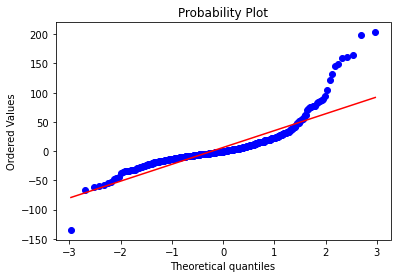

In [26]:
import scipy
scipy.stats.probplot(residue, dist="norm", plot=plt)
plt.show()

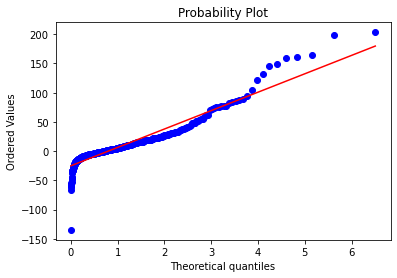

In [27]:
scipy.stats.probplot(residue, dist="expon", plot=plt)
plt.show()

In [28]:
import scipy.stats as sct

In [29]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

In [30]:
s = residue.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

In [31]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

# Out-of-samples Profit

In [32]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [33]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [34]:
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

24384.0

In [35]:
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

23880.0